In [ ]:
####Libraries used

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image
import numpy as np
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from bokeh.io import output_notebook
from bokeh.resources import INLINE
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from apyori import apriori

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

output_notebook()

Loading BokehJS ...

<div class="alert alert-block alert-warning">

### DATA PREPERATION AND VISUALISATION:
</div>

In [3]:
#Read file
df = pd.read_csv(r"C:\Users\Downloads\Data Mining\PROJECT\Project_Dataset.csv\Project_Dataset.csv")
df.head()

,Sample_ID,Charge_mode_DISTANCE,SEND_TIME,Vehicle_ID,Operation_TIME,Operation_DISTANCE,Sender,Gear_Level_Auto_Time,Gear_Level_Man_Time,Total_Distance,...,City,Cluster,Measure_ROw,Is_Bttery_Changed,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,IS_Battery_Supplier_Type2_FAULTY,IS_VIP_FLEET,Battery_Supplier
0,262526303,NaN,2019-03-11 17:35:14,1,9157.192,247897.59,1,NaN,NaN,NaN,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
1,115517796,NaN,2017-11-10 18:09:35,1,3146.041,161516.35,1,NaN,NaN,50943.11,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
2,251857645,NaN,2019-02-21 07:24:22,1,8900.673,134506.02,2,NaN,NaN,134506.02,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
3,47893312,NaN,2015-12-20 16:26:27,1,1386.207,27599.18,1,NaN,NaN,26583.39,...,1.0,1.0,1452,0,0,1,0,0,0,1.0
4,96601019,NaN,2017-06-12 13:01:16,1,1146.683,129568.38,1,NaN,NaN,18833.12,...,1.0,1.0,1452,0,0,1,0,0,0,1.0


In [4]:
#sendtime to numeric conversion
from datetime import datetime,timedelta
df['SEND_TIME'] = pd.to_numeric(df['SEND_TIME'], errors='ignore')
print(type(df.SEND_TIME[13]))
df = df.replace('[^\d.]','',regex=True).astype(float)
print(type(df.SEND_TIME[13]))
print(df.SEND_TIME[13])

<class 'str'>
<class 'numpy.float64'>
20151220103956.0


In [5]:
#print(df.isnull().mean() * 100)
print(df.columns)

Index(['Sample_ID', 'Charge_mode_DISTANCE', 'SEND_TIME', 'Vehicle_ID',
       'Operation_TIME', 'Operation_DISTANCE', 'Sender',
       'Gear_Level_Auto_Time', 'Gear_Level_Man_Time', 'Total_Distance',
       'Brake_Time', 'Cruise_Time', 'Drive_Distance', 'Drive_Fuel',
       'Drive_Time', 'Idle_Fuel', 'Coasting_Time', 'Econ_Time', 'Idle_Time',
       'Key_On_Time', 'Pedal_Time', 'measure35', 'measure36', 'measure37',
       'measure38', 'measure39', 'measure40', 'measure41', 'measure42',
       'measure43', 'measure44', 'measure45', 'measure46', 'measure47',
       'measure48', 'measure49', 'Measure_G-1_Time', 'State_Of_Health_Battery',
       'Diesel_Mode_Total_Fuel', 'measure50', 'measure51', 'Measure_3',
       'Electric_Mode_Time', 'Hybrid_Mode_Time', 'Charge_Mode_Time',
       'Diesel_Mode_Time', 'Total_Time', 'Electric_Mode_Distance',
       'Hybrid_Mode_Distance', 'Diesel_Mode_Distance', 'Total_Distance.1',
       'Battery_Version', 'Battery_Replacement_date', 'Battery_Generation

In [6]:
df.State_Of_Health_Battery.isnull().mean() * 100

75.18783732985581

In [7]:
df.Engine_Type.isnull().mean() * 100

15.793534404744777

In [8]:
df = df.drop_duplicates()
print(df.columns)

Index(['Sample_ID', 'Charge_mode_DISTANCE', 'SEND_TIME', 'Vehicle_ID',
       'Operation_TIME', 'Operation_DISTANCE', 'Sender',
       'Gear_Level_Auto_Time', 'Gear_Level_Man_Time', 'Total_Distance',
       'Brake_Time', 'Cruise_Time', 'Drive_Distance', 'Drive_Fuel',
       'Drive_Time', 'Idle_Fuel', 'Coasting_Time', 'Econ_Time', 'Idle_Time',
       'Key_On_Time', 'Pedal_Time', 'measure35', 'measure36', 'measure37',
       'measure38', 'measure39', 'measure40', 'measure41', 'measure42',
       'measure43', 'measure44', 'measure45', 'measure46', 'measure47',
       'measure48', 'measure49', 'Measure_G-1_Time', 'State_Of_Health_Battery',
       'Diesel_Mode_Total_Fuel', 'measure50', 'measure51', 'Measure_3',
       'Electric_Mode_Time', 'Hybrid_Mode_Time', 'Charge_Mode_Time',
       'Diesel_Mode_Time', 'Total_Time', 'Electric_Mode_Distance',
       'Hybrid_Mode_Distance', 'Diesel_Mode_Distance', 'Total_Distance.1',
       'Battery_Version', 'Battery_Replacement_date', 'Battery_Generation

In [9]:
df.isnull().mean() * 100

Sample_ID                            0.000000
Charge_mode_DISTANCE                72.378051
SEND_TIME                            0.195031
Vehicle_ID                           0.000000
Operation_TIME                       0.011718
                                      ...    
IS_FLEET_TOF_MONITORED               0.000000
IS_CHECKED_IN_VDA                    0.000000
IS_Battery_Supplier_Type2_FAULTY     0.000000
IS_VIP_FLEET                         0.000000
Battery_Supplier                     2.953072
Length: 76, dtype: float64

In [10]:
df1=df.loc[:,df.isnull().mean() * 100 < 76]
print(df1.shape)


(861916, 64)


In [11]:
print(df1.columns)

Index(['Sample_ID', 'Charge_mode_DISTANCE', 'SEND_TIME', 'Vehicle_ID',
       'Operation_TIME', 'Operation_DISTANCE', 'Sender', 'Total_Distance',
       'Brake_Time', 'Drive_Distance', 'Drive_Fuel', 'Drive_Time', 'Idle_Fuel',
       'Idle_Time', 'Key_On_Time', 'measure38', 'measure39', 'measure41',
       'measure42', 'measure43', 'measure44', 'measure45', 'measure46',
       'measure47', 'measure48', 'measure49', 'State_Of_Health_Battery',
       'Diesel_Mode_Total_Fuel', 'measure50', 'measure51', 'Measure_3',
       'Electric_Mode_Time', 'Hybrid_Mode_Time', 'Charge_Mode_Time',
       'Diesel_Mode_Time', 'Total_Time', 'Electric_Mode_Distance',
       'Hybrid_Mode_Distance', 'Diesel_Mode_Distance', 'Total_Distance.1',
       'Battery_Version', 'Battery_Replacement_date', 'Battery_Generation',
       'Fleet_ID', 'Country', 'Vehicle_MRK_TYPE', 'EMISSION_LEVEL',
       'CURRENT_YEARLY_MILEAGE', 'Measure_2', 'Mounted_Battery_Generation',
       'Measure_1', 'Measure_R_D', 'Engine_Type', 'G

Text(0.5, 1.0, 'engine type')

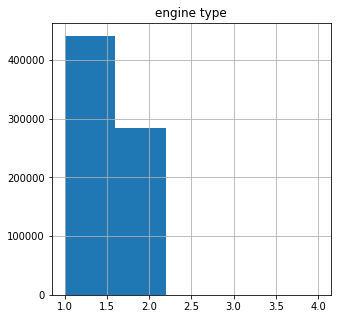

In [152]:
df.Engine_Type.hist(bins=5,figsize=(5,5))
plt.title("engine type")

In [ ]:
####Using imputer to remove the Null values

In [13]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df2=pd.DataFrame(imp_mean.fit_transform(df1))

In [14]:
df2.columns = ['Sample_ID', 'Charge_mode_DISTANCE', 'SEND_TIME', 'Vehicle_ID',
       'Operation_TIME', 'Operation_DISTANCE', 'Sender', 'Total_Distance',
       'Brake_Time', 'Drive_Distance', 'Drive_Fuel', 'Drive_Time', 'Idle_Fuel',
       'Idle_Time', 'Key_On_Time', 'measure38', 'measure39', 'measure41',
       'measure42', 'measure43', 'measure44', 'measure45', 'measure46',
       'measure47', 'measure48', 'measure49', 'State_Of_Health_Battery',
       'Diesel_Mode_Total_Fuel', 'measure50', 'measure51', 'Measure_3',
       'Electric_Mode_Time', 'Hybrid_Mode_Time', 'Charge_Mode_Time',
       'Diesel_Mode_Time', 'Total_Time', 'Electric_Mode_Distance',
       'Hybrid_Mode_Distance', 'Diesel_Mode_Distance', 'Total_Distance.1',
       'Battery_Version', 'Battery_Replacement_date', 'Battery_Generation',
       'Fleet_ID', 'Country', 'Vehicle_MRK_TYPE', 'EMISSION_LEVEL',
       'CURRENT_YEARLY_MILEAGE', 'Measure_2', 'Mounted_Battery_Generation',
       'Measure_1', 'Measure_R_D', 'Engine_Type', 'Geo_Area', 'City',
       'Cluster', 'Measure_ROw', 'Is_Bttery_Changed', 'IS_PATTERN_AVAILABLE',
       'IS_FLEET_TOF_MONITORED', 'IS_CHECKED_IN_VDA',
       'IS_Battery_Supplier_Type2_FAULTY', 'IS_VIP_FLEET', 'Battery_Supplier']

In [15]:
print(df2.columns)

Index(['Sample_ID', 'Charge_mode_DISTANCE', 'SEND_TIME', 'Vehicle_ID',
       'Operation_TIME', 'Operation_DISTANCE', 'Sender', 'Total_Distance',
       'Brake_Time', 'Drive_Distance', 'Drive_Fuel', 'Drive_Time', 'Idle_Fuel',
       'Idle_Time', 'Key_On_Time', 'measure38', 'measure39', 'measure41',
       'measure42', 'measure43', 'measure44', 'measure45', 'measure46',
       'measure47', 'measure48', 'measure49', 'State_Of_Health_Battery',
       'Diesel_Mode_Total_Fuel', 'measure50', 'measure51', 'Measure_3',
       'Electric_Mode_Time', 'Hybrid_Mode_Time', 'Charge_Mode_Time',
       'Diesel_Mode_Time', 'Total_Time', 'Electric_Mode_Distance',
       'Hybrid_Mode_Distance', 'Diesel_Mode_Distance', 'Total_Distance.1',
       'Battery_Version', 'Battery_Replacement_date', 'Battery_Generation',
       'Fleet_ID', 'Country', 'Vehicle_MRK_TYPE', 'EMISSION_LEVEL',
       'CURRENT_YEARLY_MILEAGE', 'Measure_2', 'Mounted_Battery_Generation',
       'Measure_1', 'Measure_R_D', 'Engine_Type', 'G

In [16]:
df2.isnull().mean() * 100

Sample_ID                           0.0
Charge_mode_DISTANCE                0.0
SEND_TIME                           0.0
Vehicle_ID                          0.0
Operation_TIME                      0.0
                                   ... 
IS_FLEET_TOF_MONITORED              0.0
IS_CHECKED_IN_VDA                   0.0
IS_Battery_Supplier_Type2_FAULTY    0.0
IS_VIP_FLEET                        0.0
Battery_Supplier                    0.0
Length: 64, dtype: float64

In [17]:
print(max(df2.EMISSION_LEVEL))
print(max(df2.Engine_Type))
print(min(df2.Is_Bttery_Changed))
print(min(df2.State_Of_Health_Battery))
print(df2.shape)

2.0
4.0
0.0
0.0
(861916, 64)


In [ ]:
#correlation map

In [18]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df2.iloc[:,range(0,64)].values)
cov_mat =np.cov(X_std.T)

Text(0.5, 1, 'Covariance matrix showing correlation coefficients')

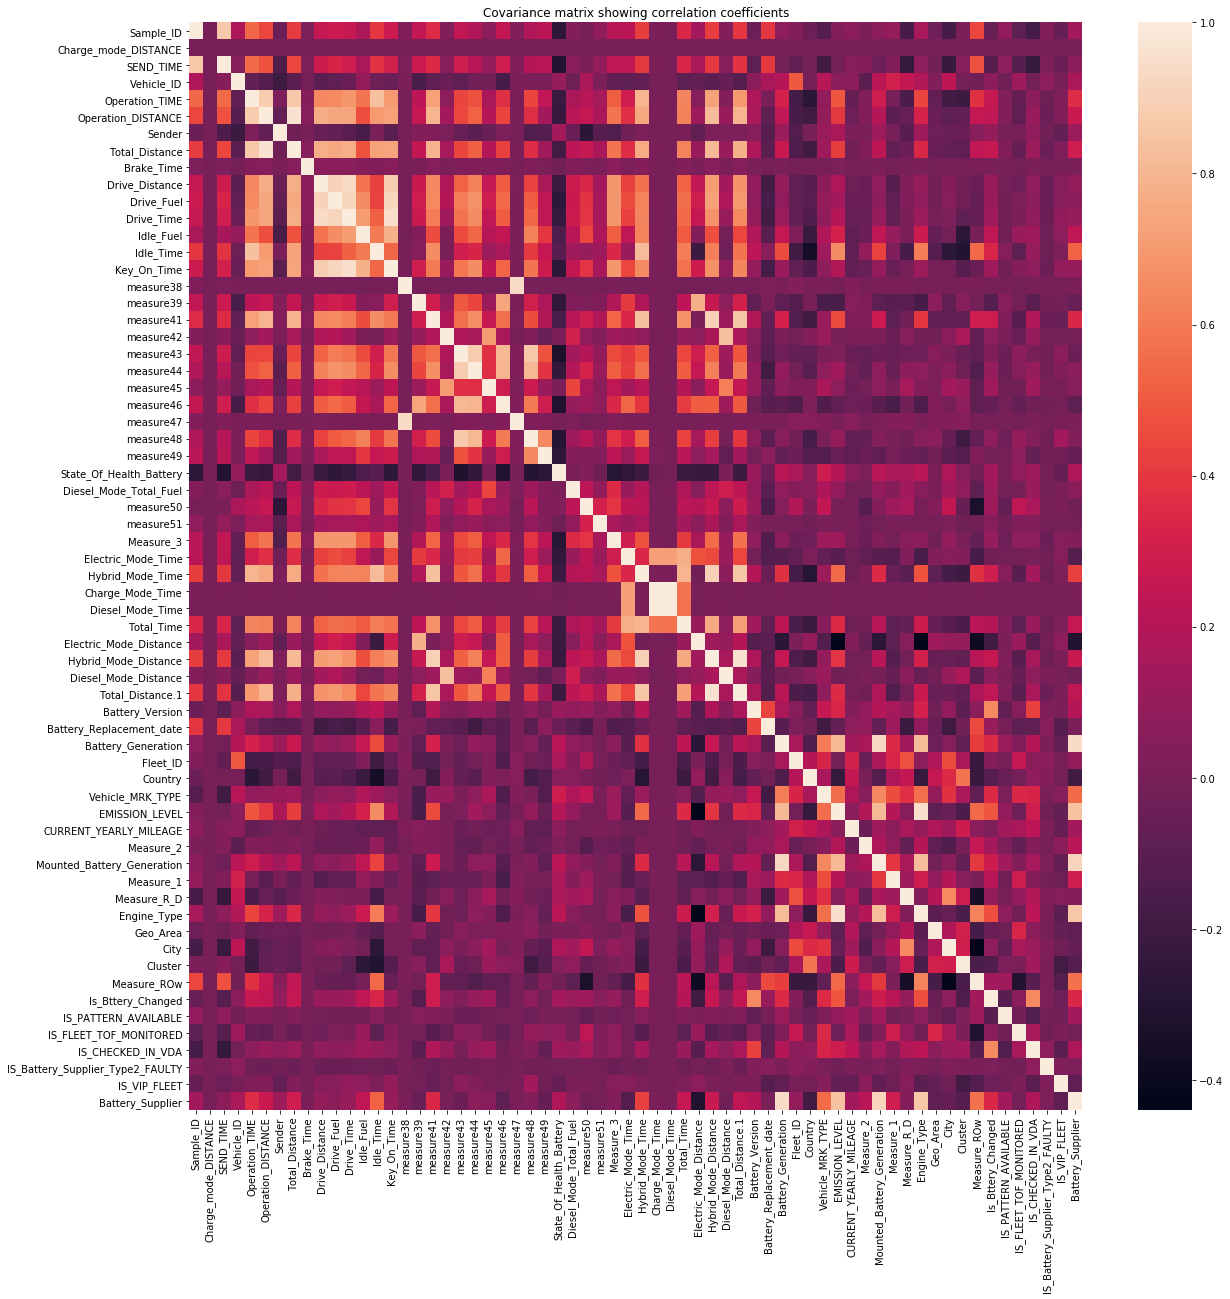

In [19]:
plt.figure(figsize=(20,20))
#ns.set(font_scale=8.5)
hm = sns.heatmap(cov_mat,yticklabels=df2.columns,
                 xticklabels=df2.columns)
#hm.savefig("correlation.png")
#plt.clf() 
#Image(filename='correlation.png')
plt.title('Covariance matrix showing correlation coefficients')
#plt.tight_layout()
#plt.show()

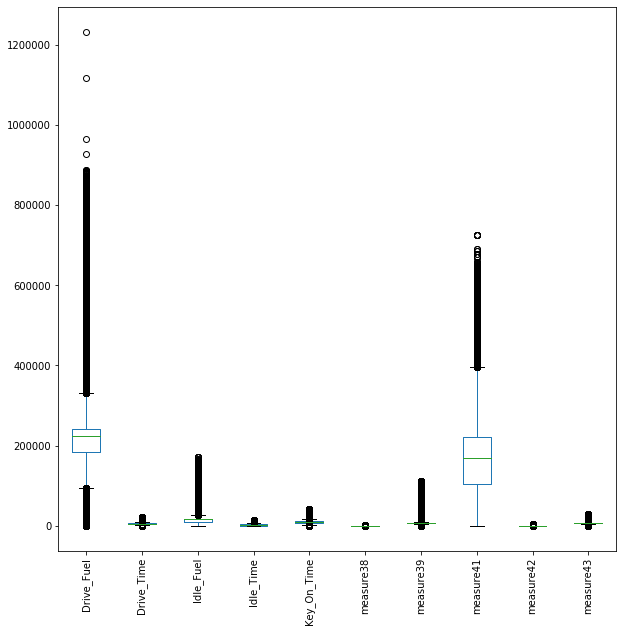

In [20]:
#box plot
df2.iloc[:,10:20].boxplot(grid=False, rot=90, fontsize=10,figsize=(10,10))
plt.show()

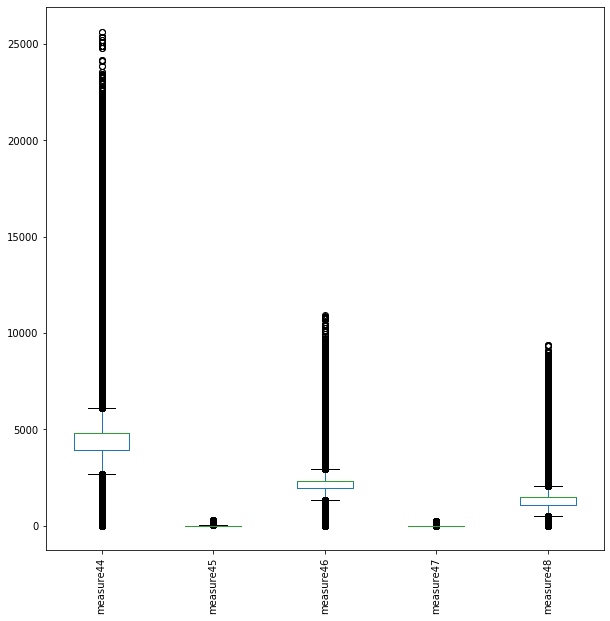

In [21]:
df2.iloc[:,20:25].boxplot(grid=False, rot=90, fontsize=10,figsize=(10,10))
plt.show()

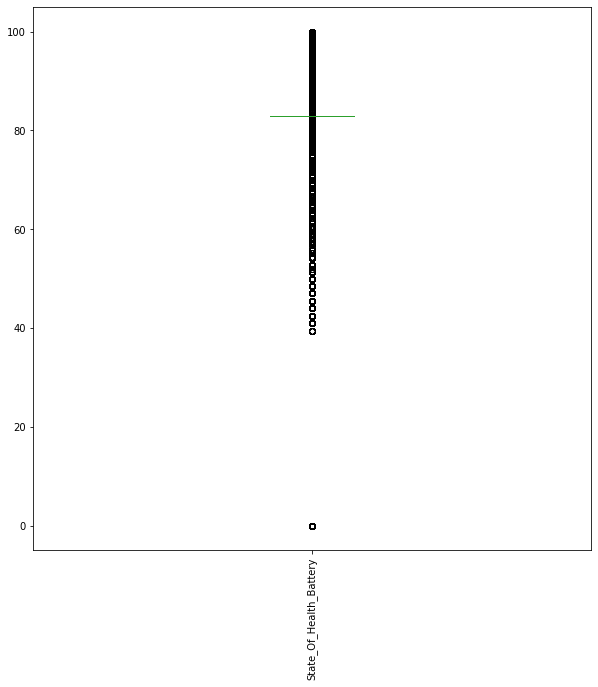

In [22]:
df2.iloc[:,26:27].boxplot(grid=False, rot=90, fontsize=10,figsize=(10,10))
plt.show()

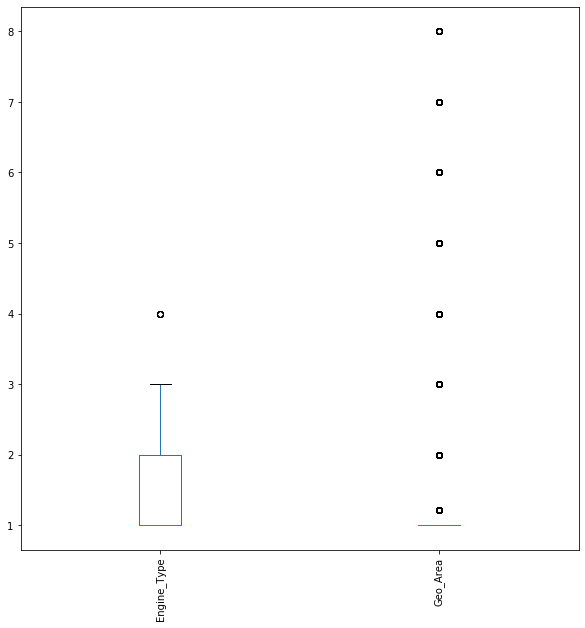

In [23]:
df2.iloc[:,52:54].boxplot(grid=False, rot=90, fontsize=10,figsize=(10,10))
plt.show()

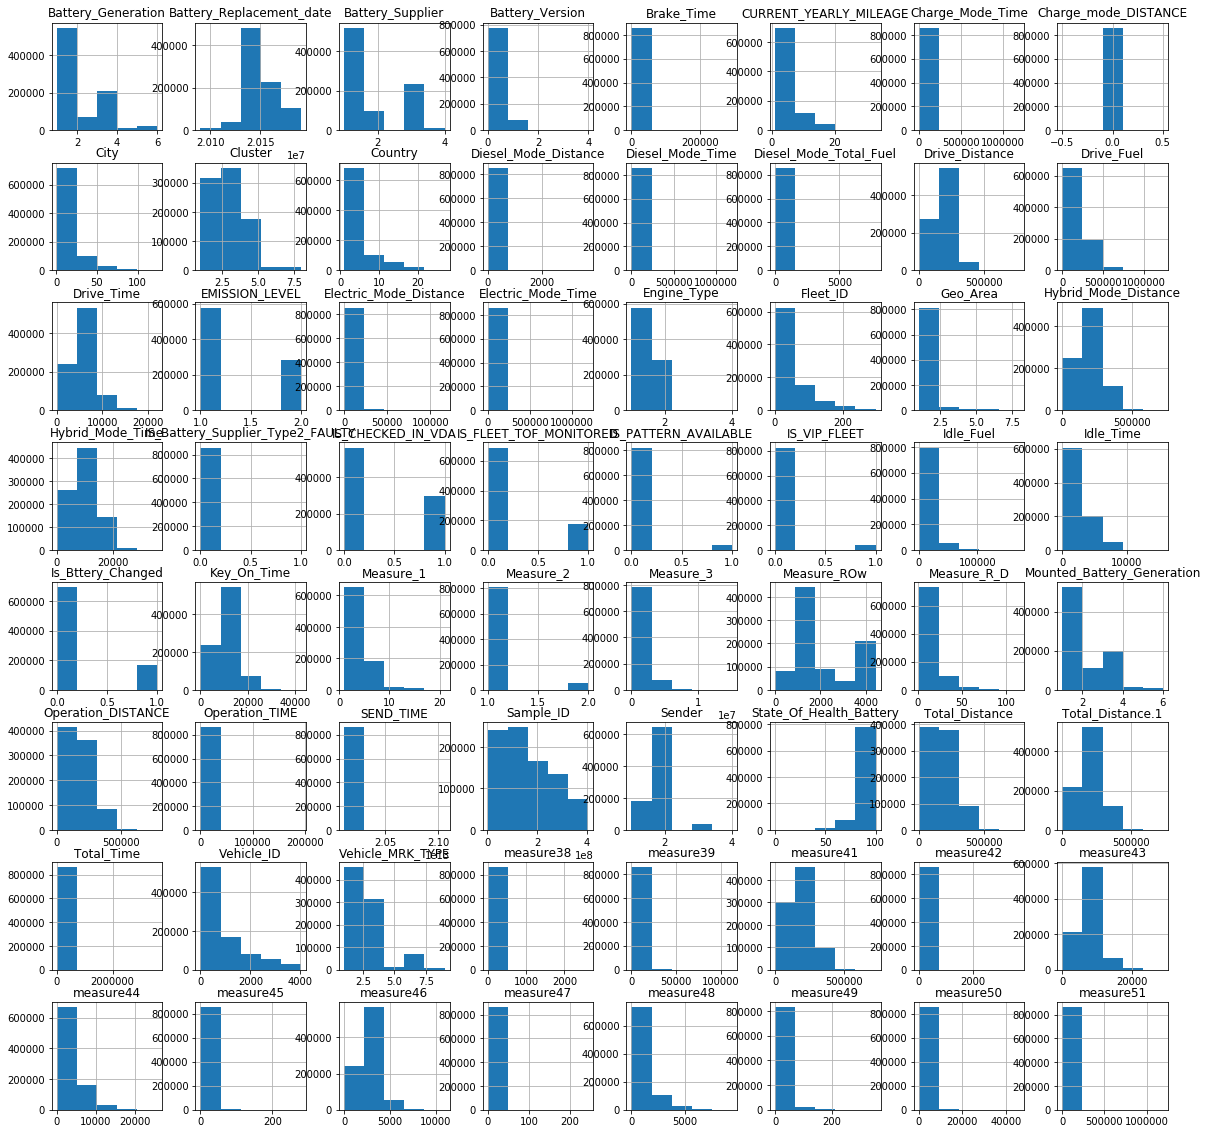

In [24]:
#histogram plot
df2.hist(bins=5,figsize=(20,20))
plt.show()

<div class="alert alert-block alert-warning">

### OUTLIER REMOVAL:
</div>

In [25]:
#Q1 = df2.quantile(0.25)
#Q3 = df2.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
#df3.shape

<div class="alert alert-block alert-warning">

### CORRELATION AND OTHER VISUALISATIONS:
</div>

In [26]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df2.iloc[:,range(0,64)].values)
cov_mat =np.cov(X_std.T)

Text(0.5, 1, 'Covariance matrix showing correlation coefficients')

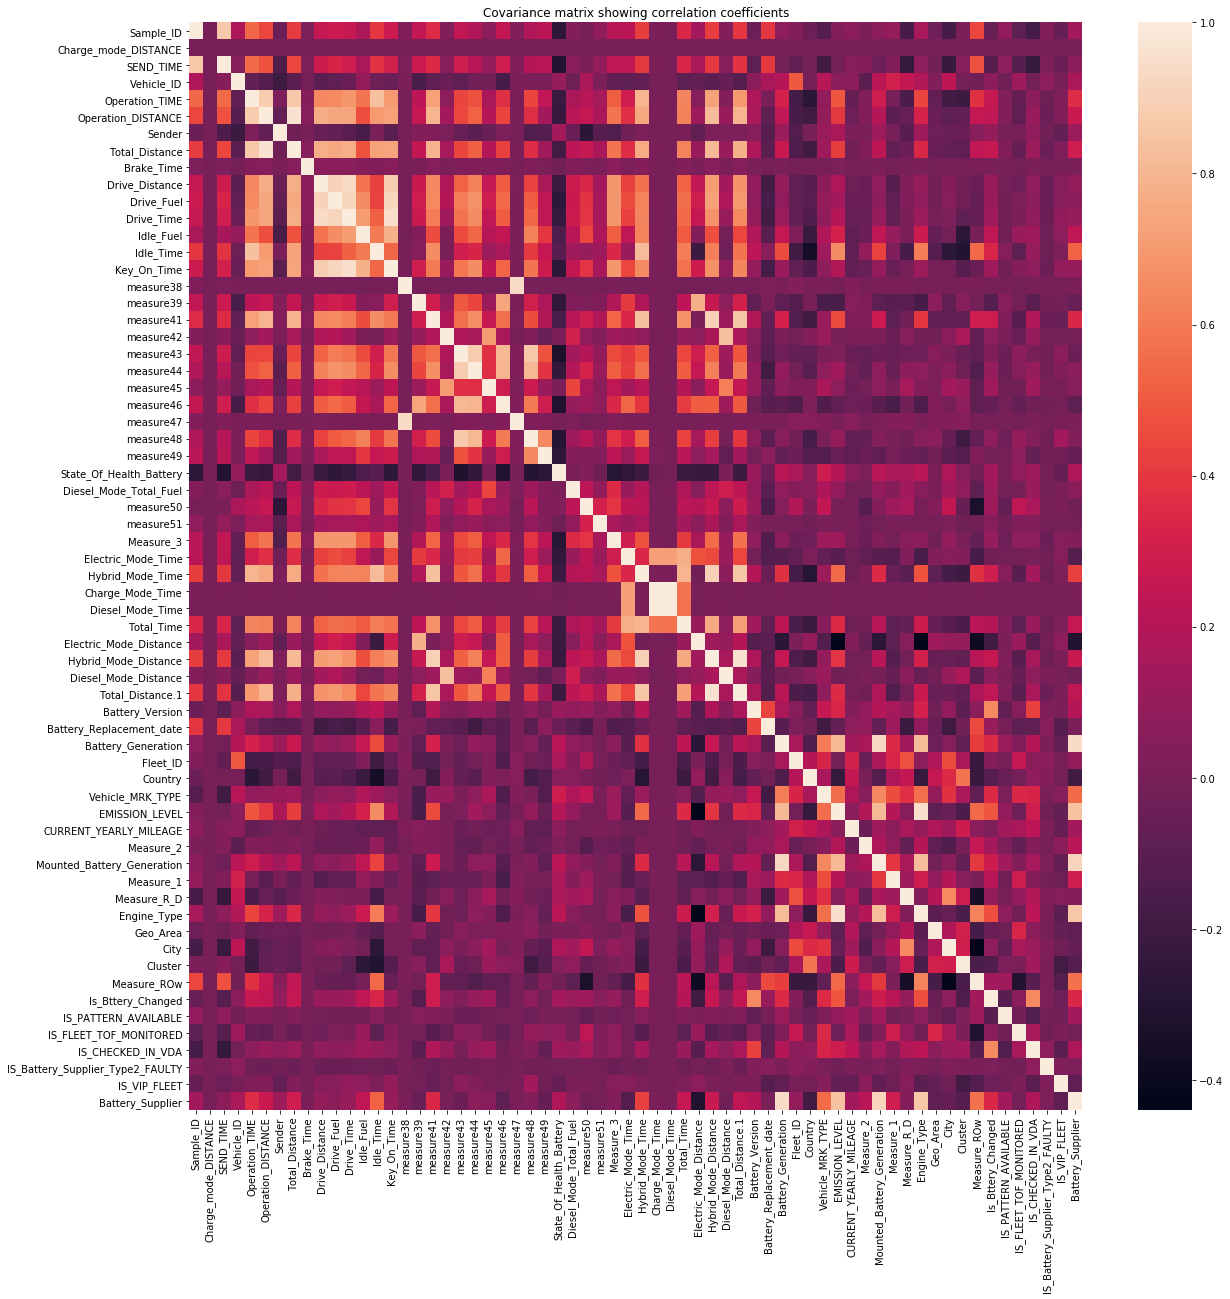

In [27]:
plt.figure(figsize=(20,20))
#ns.set(font_scale=8.5)
hm = sns.heatmap(cov_mat,yticklabels=df2.columns,
                 xticklabels=df2.columns)
#hm.savefig("correlation.png")
#plt.clf() 
#Image(filename='correlation.png')
plt.title('Covariance matrix showing correlation coefficients')
#plt.tight_layout()
#plt.show()

In [28]:
df4=df2.sample(frac =.1) 
print(df4.shape)

(86192, 64)


In [29]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df4.iloc[:,range(0,64)].values)
cov_mat =np.cov(X_std.T)

In [30]:
cov_mat1=df4.corr()

Text(0.5, 1, 'Covariance matrix showing correlation coefficients')

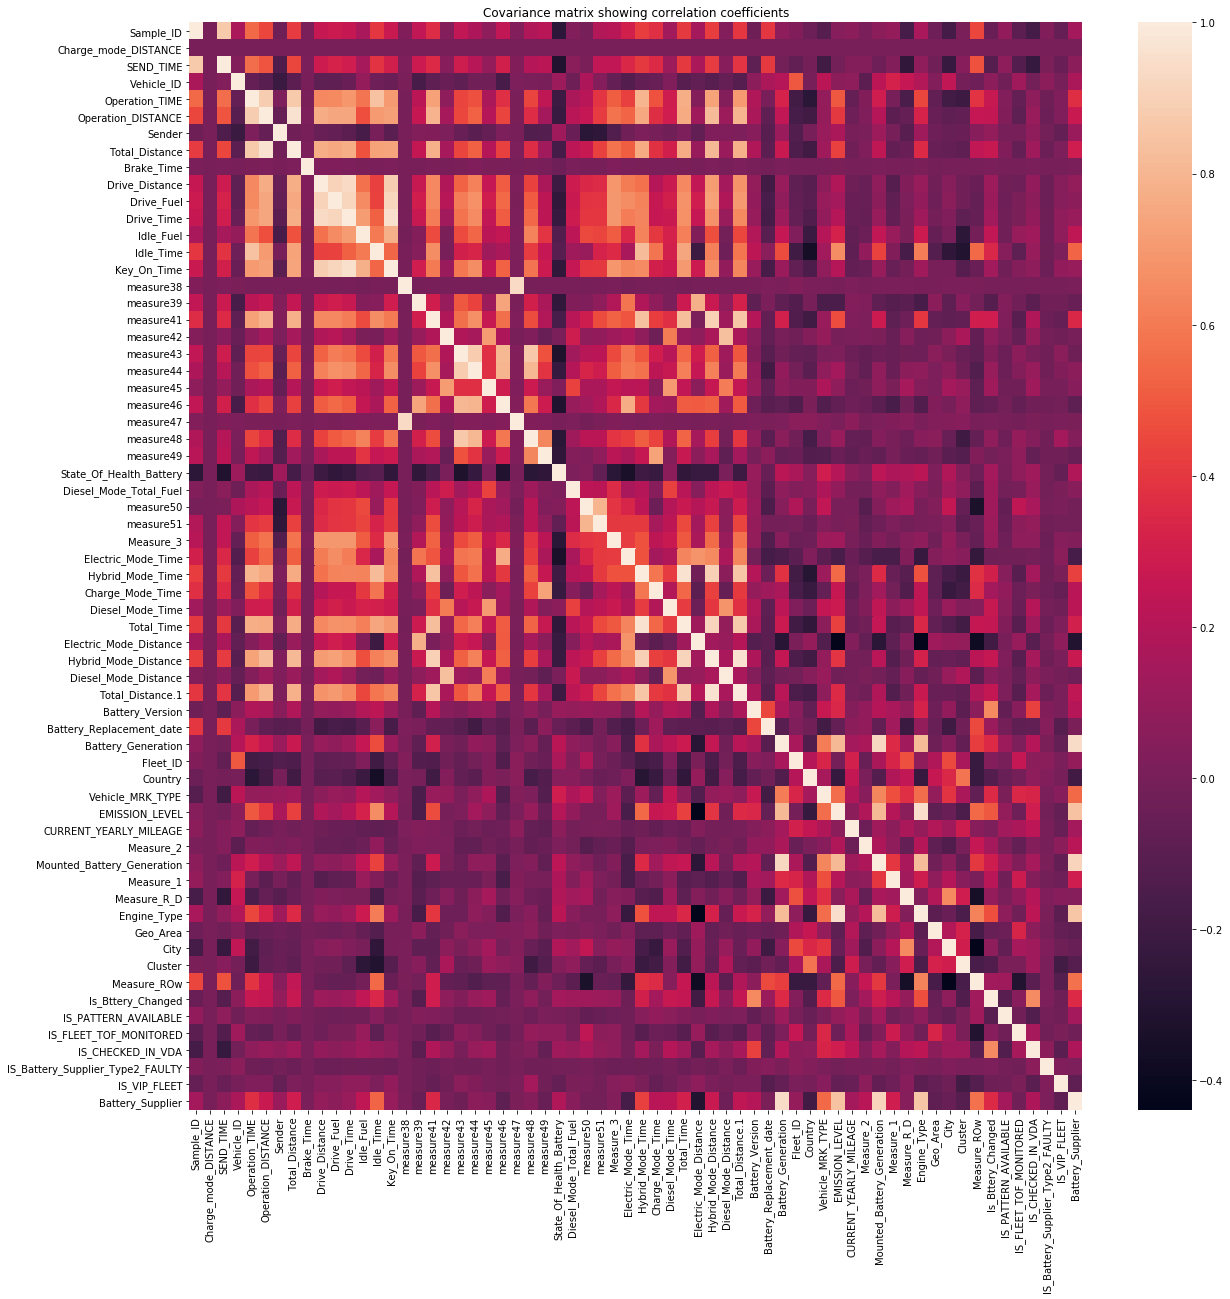

In [31]:
plt.figure(figsize=(20,20))
#ns.set(font_scale=8.5)
hm = sns.heatmap(cov_mat,yticklabels=df4.columns,
                 xticklabels=df4.columns)
#hm.savefig("correlation.png")
#plt.clf() 
#Image(filename='correlation.png')
plt.title('Covariance matrix showing correlation coefficients')
#plt.tight_layout()
#plt.show()

Text(0.5, 1, 'Correlation matrix showing correlation coefficients')

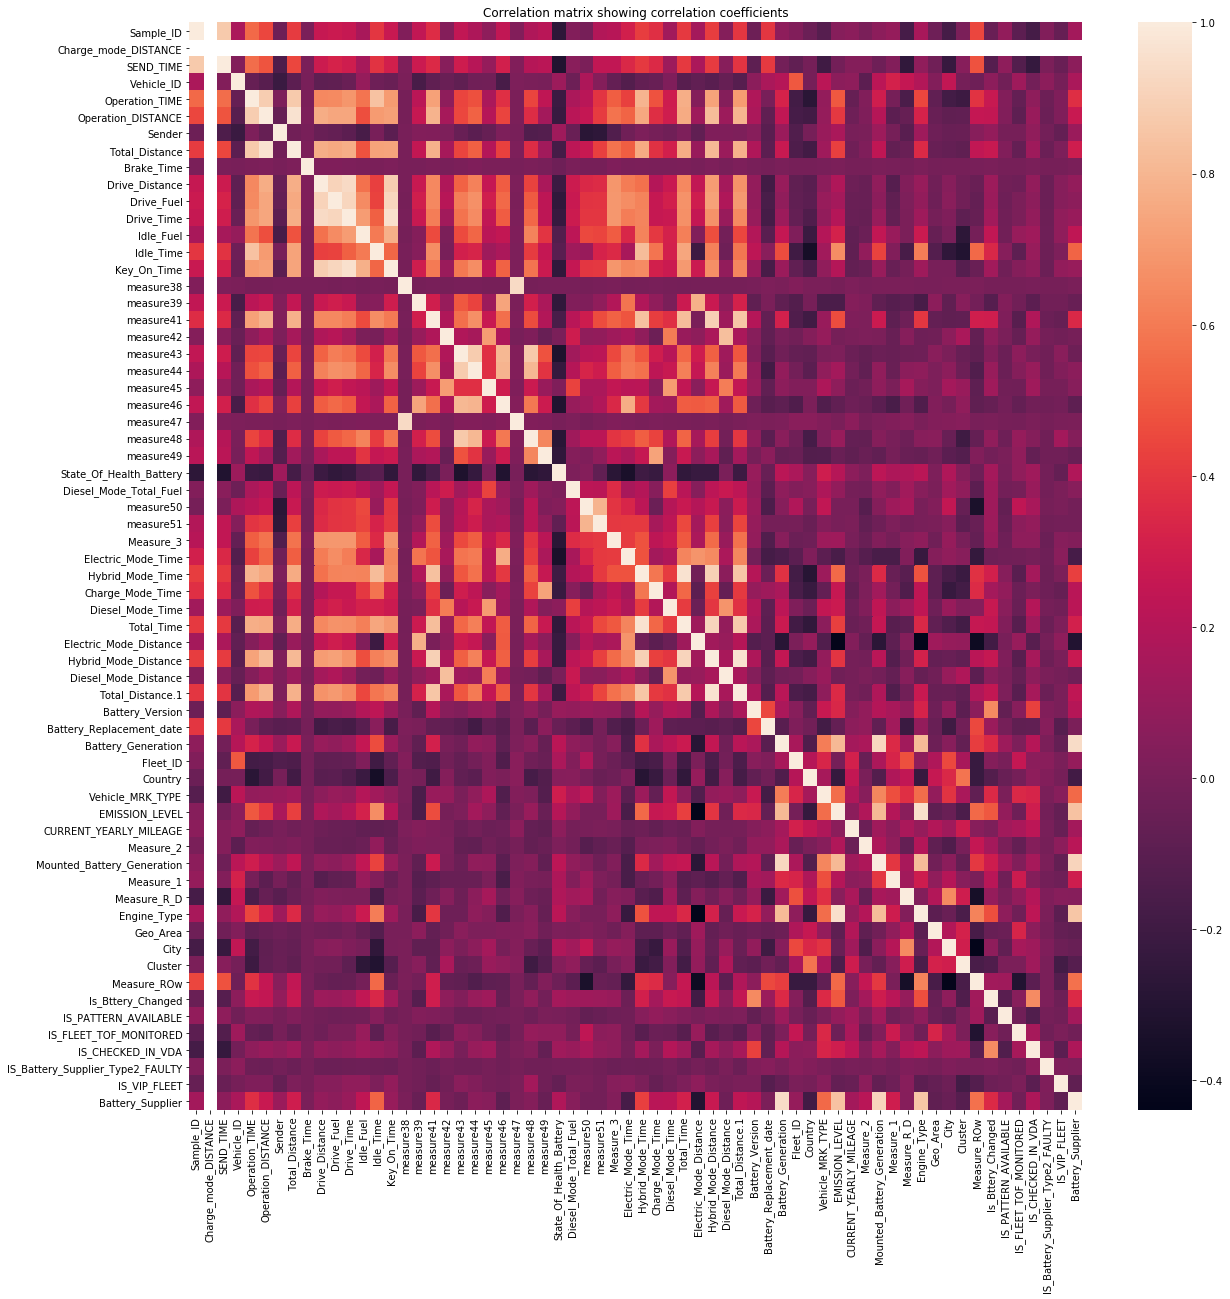

In [32]:
plt.figure(figsize=(20,20))
#ns.set(font_scale=8.5)
hm = sns.heatmap(cov_mat1,yticklabels=df4.columns,
                 xticklabels=df4.columns)
#hm.savefig("correlation.png")
#plt.clf() 
#Image(filename='correlation.png')
plt.title('Correlation matrix showing correlation coefficients')
#plt.tight_layout()
#plt.show()

In [33]:
upper = cov_mat1.where(np.triu(np.ones(cov_mat1.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df4.drop(df4[to_drop], axis=1)
print(len(df4.columns))

64


Text(0.5, 1.0, 'city')

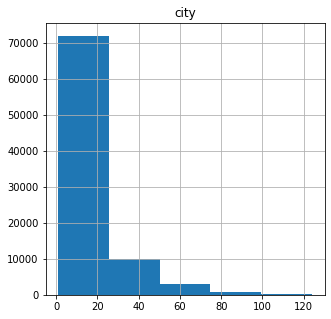

In [153]:
df4.City.hist(bins=5,figsize=(5,5))
plt.title("city")

Text(0.5, 1.0, 'State_Of_Health_Battery')

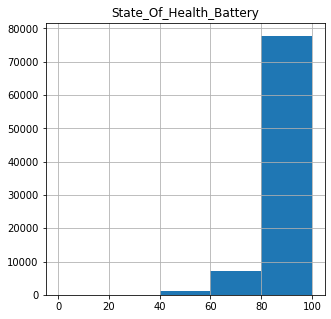

In [154]:
df4.State_Of_Health_Battery.hist(bins=5,figsize=(5,5))
plt.title("State_Of_Health_Battery")

Text(0.5, 1.0, 'EMISSION_LEVEL')

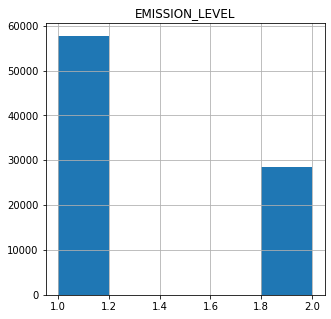

In [155]:
df4.EMISSION_LEVEL.hist(bins=5,figsize=(5,5))
plt.title("EMISSION_LEVEL")

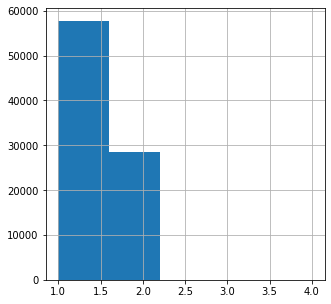

In [37]:
df4.Engine_Type.hist(bins=5,figsize=(5,5))

<div class="alert alert-block alert-warning">

### Task1_main_sub:
predictiong state of health of battery
    
</div>

In [158]:
#finding correlation of all columns with CURRENT_YEARLY_MILEAGE

df_battery=pd.DataFrame(df4.loc[:, df4.corr()['State_Of_Health_Battery'] > 0.2])
df_battery.columns

Index(['State_Of_Health_Battery', 'Battery_Generation', 'Vehicle_MRK_TYPE',
       'EMISSION_LEVEL', 'Mounted_Battery_Generation', 'Engine_Type'],
      dtype='object')

In [159]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

X_1 = df4.drop('State_Of_Health_Battery',axis=1)
y_1 = df4['State_Of_Health_Battery']


X_norm = MinMaxScaler().fit_transform(X_1)

embeded_lr_selector = SelectFromModel(RandomForestRegressor(), max_features=15)
embeded_lr_selector.fit(X_norm, y_1)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_1.loc[:,embeded_lr_support].columns.tolist()
print(embeded_lr_feature, 'selected features')

['Sample_ID', 'SEND_TIME', 'Brake_Time', 'Key_On_Time', 'measure43', 'measure48', 'Measure_3', 'Hybrid_Mode_Time', 'Diesel_Mode_Time', 'Total_Time', 'Electric_Mode_Distance', 'Hybrid_Mode_Distance', 'Vehicle_MRK_TYPE', 'Cluster', 'Measure_ROw'] selected features



<div class="alert alert-block alert-warning">

### Feature Selection:
</div>

In [160]:

y=df4.State_Of_Health_Battery
x =df4.loc[:,['Brake_Time','Measure_3', 'Electric_Mode_Time', 'Hybrid_Mode_Time', 'Total_Time', 'Electric_Mode_Distance', 'Total_Distance.1', 'Measure_ROw']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[0.11895857 0.1514384  0.07311265 0.12734884 0.08196024 0.14186465
 0.0873314  0.21798524]
Feature: 0, Score: 0.11896
Feature: 1, Score: 0.15144
Feature: 2, Score: 0.07311
Feature: 3, Score: 0.12735
Feature: 4, Score: 0.08196
Feature: 5, Score: 0.14186
Feature: 6, Score: 0.08733
Feature: 7, Score: 0.21799


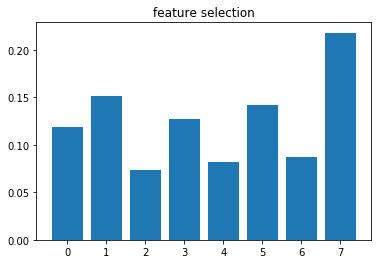

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
print(importance)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.title("feature selection")
plt.show()

<div class="alert alert-block alert-warning">

### Model tarining, Evaluation, Hyper parameter Tuning, Statistaical test
</div>

In [162]:

y=df4.State_Of_Health_Battery
x =df4.loc[:,['Brake_Time','Measure_3', 'Electric_Mode_Time', 'Hybrid_Mode_Time', 'Total_Time', 'Electric_Mode_Distance', 'Total_Distance.1', 'Measure_ROw']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(n_estimators=36)
model.fit(X_train, y_train)

prediction_battery = model.predict(X_test)
forest_score_battery=model.score(X_test, y_test)
#print('The random forest params best:',grid_battery.best_params_)
print('The random forest score:', forest_score_battery)

The random forest score: 0.7567467978048923


In [236]:

print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(y_test, prediction_battery))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(y_test, prediction_battery))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(y_test, prediction_battery)))

Mean Absolute Error: 0.9148428431525754
Mean Squared Error: 9.61282689245947
Root Mean Squared Error: 3.100455916870851


In [237]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

prediction_battery_dt = regressor.predict(X_test)
dt_score_battery=regressor.score(X_test, y_test)
#print('The random forest params best:',grid_battery.best_params_)
print('The descision tree score:', dt_score_battery)

The descision tree score: 0.6337118883144843


In [238]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_battery_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_battery_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_battery_dt)))

Mean Absolute Error: 0.9739579325989959
Mean Squared Error: 16.84732019771205
Root Mean Squared Error: 4.104548720348201


Linear Regression

In [239]:
from sklearn.linear_model import LinearRegression
reg_battery = LinearRegression().fit(X_train, y_train)
prediction_battery_reg = reg_battery.predict(X_test)
rg_score_battery=reg_battery.score(X_test, y_test)
#print('The random forest params best:',grid_battery.best_params_)
print('The linear regression score:', rg_score_battery)

The linear regression score: 0.18350239736008378


In [240]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_battery_reg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_battery_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_battery_reg)))

Mean Absolute Error: 3.4581583169688663
Mean Squared Error: 37.55458098009267
Root Mean Squared Error: 6.128179254892327


Ploynomial Regression

In [193]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train, y_train)

prediction_battery_ploy = polyreg.predict(X_test)
poly_score_battery=polyreg.score(X_test, y_test)
#print('The random forest params best:',grid_battery.best_params_)
print('The poly score:', rg_score_battery)

The poly score: 0.23166566360024365


In [194]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_battery_ploy))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_battery_ploy))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_battery_ploy)))

Mean Absolute Error: 3.252380070606611
Mean Squared Error: 30.25739482393293
Root Mean Squared Error: 5.500672215641733


In [241]:
from sklearn.svm import SVR

regressor_svr = SVR(kernel='sigmoid')
regressor_svr.fit(X_train, y_train)

prediction_battery_svr = regressor_svr.predict(X_test)
svr_score_battery=regressor_svr.score(X_test, y_test)
#print('The random forest params best:',grid_battery.best_params_)
print('The SVR score:', svr_score_battery)

The SVR score: -9011.85083017949


In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30,40,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid_battery = GridSearchCV(model, param_grid)
grid_battery.fit(X_train, y_train)

prediction_battery = grid_battery.predict(X_test)
forest_score_battery=grid_battery.score(X_test, y_test)
print('The random forest params best:',grid_battery.best_params_)
print('The random forest score:', forest_score_battery)

The random forest params best: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}
The random forest score: 0.8040683764234247


In [183]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_battery))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_battery))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_battery)))

Mean Absolute Error: 0.8644797297571208
Mean Squared Error: 9.209290659461516
Root Mean Squared Error: 3.0346813110212274


Statistical significance test

<div class="alert alert-block alert-warning">

### Task2_unsupervised:
Anomaly detection Engine_Type using Isolation forest
    
</div>

In [184]:
#finding correlation of all columns with CURRENT_YEARLY_MILEAGE

df_battery=pd.DataFrame(df4.loc[:, df4.corr()['Engine_Type'] > 0.2])

df_battery.reset_index(inplace=True)
#print(df_battery)
df_battery.columns

Index(['index', 'Operation_TIME', 'Operation_DISTANCE', 'Total_Distance',
       'Idle_Fuel', 'Idle_Time', 'measure41', 'State_Of_Health_Battery',
       'Hybrid_Mode_Time', 'Charge_Mode_Time', 'Diesel_Mode_Time',
       'Total_Time', 'Hybrid_Mode_Distance', 'Total_Distance.1',
       'Battery_Version', 'Battery_Generation', 'Vehicle_MRK_TYPE',
       'EMISSION_LEVEL', 'Mounted_Battery_Generation', 'Measure_1',
       'Engine_Type', 'Measure_ROw', 'Is_Bttery_Changed', 'IS_CHECKED_IN_VDA',
       'Battery_Supplier'],
      dtype='object')

In [185]:
from sklearn.model_selection import train_test_split
y=df4.Engine_Type
x =df4.loc[:,['Operation_TIME', 'Operation_DISTANCE', 'Total_Distance',
           'measure41','Hybrid_Mode_Time', 'Charge_Mode_Time', 'Diesel_Mode_Time',
           'Total_Time', 'Hybrid_Mode_Distance', 'Total_Distance.1',
           'EMISSION_LEVEL','Measure_1','Measure_ROw','Engine_Type']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(type(X_train))
x.groupby(["Engine_Type"])

<class 'pandas.core.frame.DataFrame'>


In [186]:
x

,Operation_TIME,Operation_DISTANCE,Total_Distance,measure41,Hybrid_Mode_Time,Charge_Mode_Time,Diesel_Mode_Time,Total_Time,Hybrid_Mode_Distance,Total_Distance.1,EMISSION_LEVEL,Measure_1,Measure_ROw,Engine_Type
534197,17763.742,301009.303000,301009.303000,300769.993000,17658.301000,37.271000,27.892000,19442.033000,300769.99300,302582.103000,2.0,3.0,4133.0,2.000000
541369,2614.481,46657.799000,46657.799000,46548.049000,2554.906000,28.746000,6.920000,3061.951000,46548.04900,47858.099000,2.0,8.0,1515.0,2.000000
46370,90.490,168684.138197,168093.327635,169547.478055,9380.684591,38.725955,17.059385,12195.556308,186747.22905,196896.154366,2.0,8.0,43.0,2.000000
23170,17876.761,299259.873000,299259.873000,299014.033000,17760.736000,57.809000,11.420000,19578.081000,299014.03300,300769.573000,2.0,2.0,4193.0,2.000000
716359,3083.924,40377.590000,40377.590000,169547.478055,9380.684591,38.725955,17.059385,12195.556308,186747.22905,196896.154366,1.0,1.0,1112.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482507,17339.136,314195.743000,314195.743000,313844.053000,17185.579000,60.609000,23.560000,20048.422000,313844.05300,316706.443000,2.0,3.0,4157.0,2.000000
387995,8928.520,120526.940000,120526.940000,120010.550000,8819.200000,8.360000,6.040000,10871.970000,120010.55000,123712.610000,2.0,3.0,9.0,2.000000
214184,3622.598,67835.300000,67835.300000,63969.485000,3560.880833,13.130556,2.670000,5083.979444,67791.64700,196896.154366,1.0,1.0,947.0,1.000000
835114,9704.240,116032.250000,116032.250000,169547.478055,9380.684591,38.725955,17.059385,12195.556308,186747.22905,196896.154366,1.0,6.0,2034.0,1.392464


In [187]:
from sklearn.ensemble import IsolationForest

clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), 
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(x)

IsolationForest(contamination=0.12, n_jobs=-1, random_state=42)

In [188]:
pred = clf.predict(x)
df_battery['anomaly']=pred
outliers=df_battery.loc[df_battery['anomaly']==-1]
#print(outliers)
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_battery['anomaly'].value_counts())
print(df_battery.shape)

 1    75854
-1    10338
Name: anomaly, dtype: int64
(86192, 26)


In [189]:
sklearn_score_anomalies = abs(clf.score_samples(X_test))
sklearn_score_anomalies

array([0.46752927, 0.50814709, 0.4108919 , ..., 0.42145272, 0.57592951,
       0.38349336])

(86192, 3)


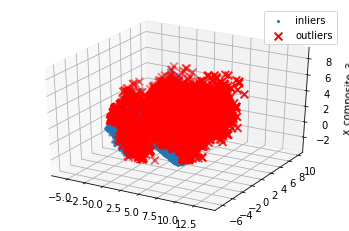

In [190]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df_battery)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",cmap="jet")
# Plot x's for the ground truth outliers
#print(len(outlier_index))
print(X_reduce.shape)
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
          lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [191]:
df_battery.groupby(['Engine_Type'])
df_battery

,index,Operation_TIME,Operation_DISTANCE,Total_Distance,Idle_Fuel,Idle_Time,measure41,State_Of_Health_Battery,Hybrid_Mode_Time,Charge_Mode_Time,...,Vehicle_MRK_TYPE,EMISSION_LEVEL,Mounted_Battery_Generation,Measure_1,Engine_Type,Measure_ROw,Is_Bttery_Changed,IS_CHECKED_IN_VDA,Battery_Supplier,anomaly
0,534197,17763.742,301009.303000,301009.303000,16964.597799,6711.988000,300769.993000,82.849888,17658.301000,37.271000,...,3.0,2.0,3.0,3.0,2.000000,4133.0,0.0,0.0,3.0,1
1,541369,2614.481,46657.799000,46657.799000,16964.597799,607.648000,46548.049000,82.849888,2554.906000,28.746000,...,3.0,2.0,3.0,8.0,2.000000,1515.0,0.0,0.0,3.0,-1
2,46370,90.490,168684.138197,168093.327635,16964.597799,2422.450477,169547.478055,82.849888,9380.684591,38.725955,...,6.0,2.0,3.0,8.0,2.000000,43.0,1.0,1.0,3.0,1
3,23170,17876.761,299259.873000,299259.873000,16964.597799,6726.553000,299014.033000,82.849888,17760.736000,57.809000,...,3.0,2.0,2.0,2.0,2.000000,4193.0,1.0,1.0,2.0,1
4,716359,3083.924,40377.590000,40377.590000,16964.597799,495.445000,169547.478055,82.849888,9380.684591,38.725955,...,2.0,1.0,1.0,1.0,1.000000,1112.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86187,482507,17339.136,314195.743000,314195.743000,16964.597799,5992.233000,313844.053000,82.849888,17185.579000,60.609000,...,3.0,2.0,3.0,3.0,2.000000,4157.0,0.0,0.0,3.0,1
86188,387995,8928.520,120526.940000,120526.940000,35688.958994,3236.430000,120010.550000,83.000000,8819.200000,8.360000,...,6.0,2.0,3.0,3.0,2.000000,9.0,1.0,1.0,3.0,1
86189,214184,3622.598,67835.300000,67835.300000,8605.294061,931.290000,63969.485000,82.849888,3560.880833,13.130556,...,1.0,1.0,1.0,1.0,1.000000,947.0,0.0,0.0,1.0,1
86190,835114,9704.240,116032.250000,116032.250000,16964.597799,2672.594000,169547.478055,82.849888,9380.684591,38.725955,...,1.0,1.0,1.0,6.0,1.392464,2034.0,0.0,0.0,1.0,1


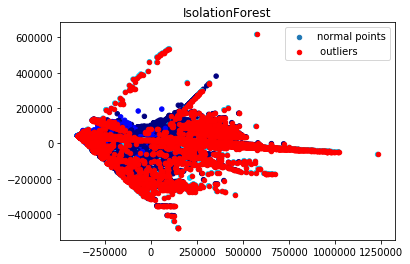

In [192]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(x)
res=pd.DataFrame(pca.transform(x))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c=df4["Engine_Type"],
                 s=20,label="normal points",cmap="jet")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',s=20,label=" outliers")
plt.legend(loc="upper right")
plt.show()

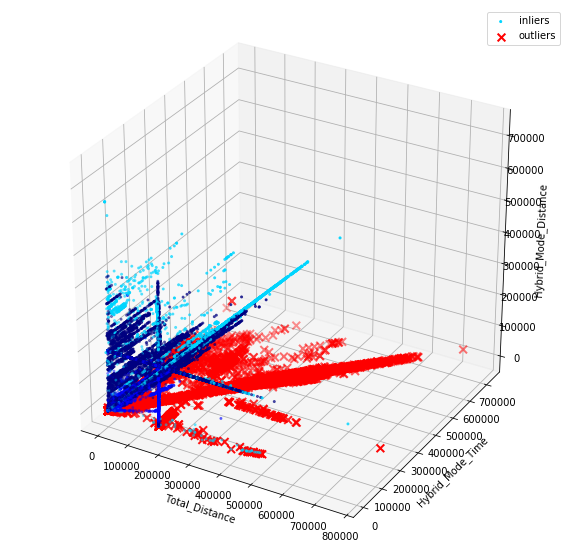

In [193]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection ='3d')
ax.scatter(x.iloc[:, 2], x.iloc[:, 4], zs=x.iloc[:, 8], s=4, lw=1, label="inliers",c=df4["Engine_Type"],cmap="jet")
# Plot x's for the ground truth outliers
#print(len(outlier_index))
#print(X_reduce.shape)
ax.scatter(x.iloc[outlier_index,2],x.iloc[outlier_index,8], x.iloc[outlier_index,4],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.set_xlabel('Total_Distance', fontsize=10, rotation=150)
ax.set_ylabel('Hybrid_Mode_Time',fontsize=10)
ax.set_zlabel("Hybrid_Mode_Distance", fontsize=10, rotation=60)
ax.legend()
plt.show()

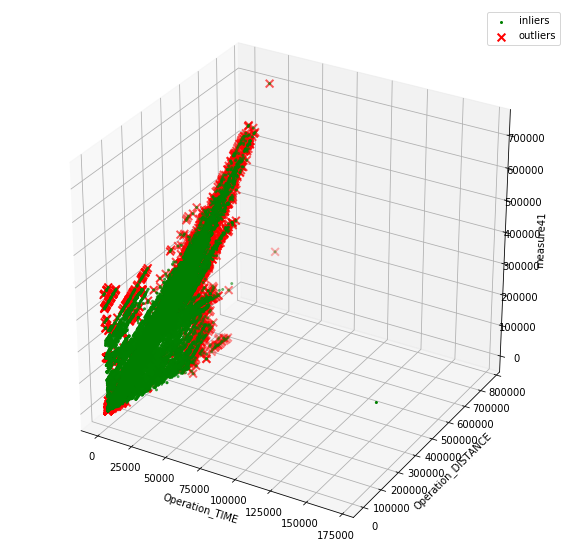

In [194]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.iloc[:, 0], x.iloc[:, 1], zs=x.iloc[:, 3], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
#print(len(outlier_index))
#print(X_reduce.shape)
ax.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1], x.iloc[outlier_index,3],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.set_xlabel('Operation_TIME', fontsize=10, rotation=150)
ax.set_ylabel('Operation_DISTANCE',fontsize=10)
ax.set_zlabel("measure41", fontsize=10, rotation=60)
ax.legend()
plt.show()

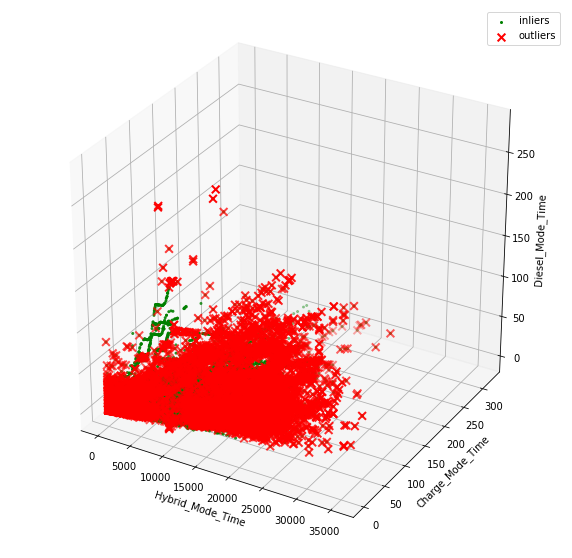

In [195]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.iloc[:, 4], x.iloc[:, 5], zs=x.iloc[:, 6], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
#print(len(outlier_index))
#print(X_reduce.shape)
ax.scatter(x.iloc[outlier_index,4],x.iloc[outlier_index,5], x.iloc[outlier_index,6],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.set_xlabel('Hybrid_Mode_Time', fontsize=10, rotation=150)
ax.set_ylabel('Charge_Mode_Time',fontsize=10)
ax.set_zlabel("Diesel_Mode_Time", fontsize=10, rotation=60)
ax.legend()
plt.show()

(86192, 3)
(86192, 14)
(86192, 65)


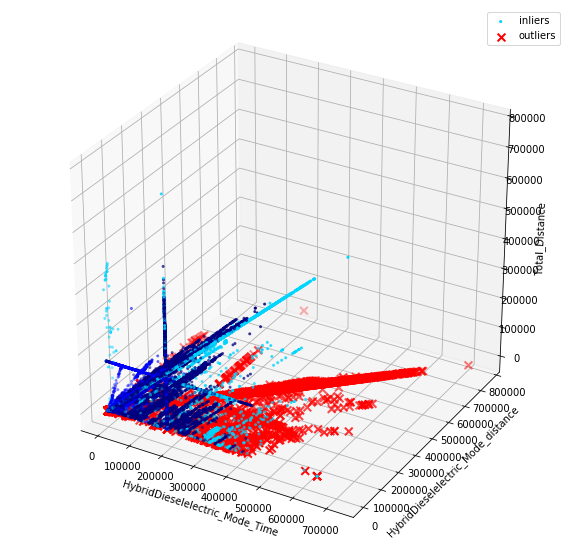

In [196]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.iloc[:, 8], x.iloc[:, 10], zs=x.iloc[:, 2], s=4, lw=1, label="inliers",c=df4["Engine_Type"],cmap="jet")
# Plot x's for the ground truth outliers
#print(len(outlier_index))
print(X_reduce.shape)
print(x.shape)
print(df4.shape)
ax.scatter(x.iloc[outlier_index,8],x.iloc[outlier_index,2], x.iloc[outlier_index,6],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.set_xlabel('HybridDieselelectric_Mode_Time', fontsize=10, rotation=150)
ax.set_ylabel('HybridDieselelectric_Mode_distance',fontsize=10)
ax.set_zlabel("Total_Distance", fontsize=10, rotation=60)
ax.legend()
plt.show()

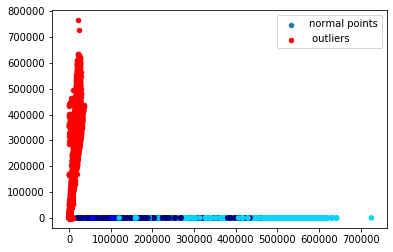

In [197]:

b1 = plt.scatter(x.iloc[:, 8], x.iloc[:, 10], c=df4["Engine_Type"],
                 s=20,label="normal points",cmap="jet")
b1 =plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1], c='red',s=20,label=" outliers")
plt.legend(loc="upper right")
plt.show()

<div class="alert alert-block alert-warning">

### Classifing Emission level with removing class imbalance:
</div>

In [175]:
#finding correlation of all columns with CURRENT_YEARLY_MILEAGE

df_battery=pd.DataFrame(df4.loc[:, df4.corr()['EMISSION_LEVEL'] > 0.2])

df_battery.reset_index(inplace=True)
#print(df_battery)
df_battery.columns

Index(['index', 'Operation_TIME', 'Operation_DISTANCE', 'Total_Distance',
       'Drive_Time', 'Idle_Fuel', 'Idle_Time', 'measure41',
       'State_Of_Health_Battery', 'Hybrid_Mode_Time', 'Charge_Mode_Time',
       'Diesel_Mode_Time', 'Total_Time', 'Hybrid_Mode_Distance',
       'Total_Distance.1', 'Battery_Version', 'Battery_Generation',
       'Vehicle_MRK_TYPE', 'EMISSION_LEVEL', 'Mounted_Battery_Generation',
       'Measure_1', 'Engine_Type', 'Measure_ROw', 'Is_Bttery_Changed',
       'IS_CHECKED_IN_VDA', 'Battery_Supplier'],
      dtype='object')

In [176]:
from sklearn.model_selection import train_test_split
y=df_battery.EMISSION_LEVEL
x =df_battery.loc[:,['Operation_TIME', 'Operation_DISTANCE', 'Total_Distance',
       'Idle_Fuel', 'Idle_Time', 'measure41', 'State_Of_Health_Battery',
       'Hybrid_Mode_Time', 'Charge_Mode_Time', 'Diesel_Mode_Time',
       'Total_Time', 'Hybrid_Mode_Distance', 'Total_Distance.1',
       'Measure_1','Engine_Type', 'Measure_ROw']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Text(0.5, 1.0, 'Emission Level')

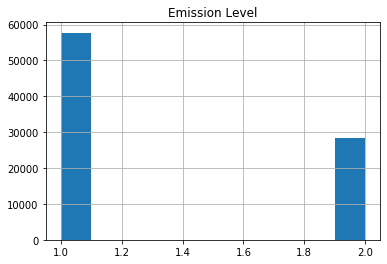

In [177]:
y.hist()
plt.title("Emission Level")

In [178]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

X_resampled, y_resampled = SMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled).items()))

[(1.0, 57712), (2.0, 57712)]


Text(0.5, 1.0, 'Class imbalance solved')

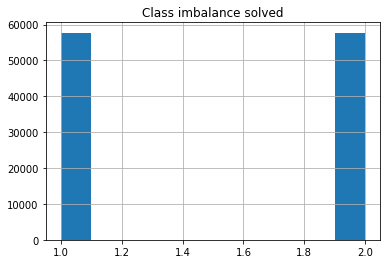

In [179]:
y_resampled.hist()
plt.title("Class imbalance solved")

In [180]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, x_test, Y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3)
sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train, Y_train)


pred_sgd = sgd.predict(x_test)
print("Accuracy SGD %s" % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy SGD 0.9307496823379924
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.93     17259
         2.0       0.96      0.90      0.93     17369

    accuracy                           0.93     34628
   macro avg       0.93      0.93      0.93     34628
weighted avg       0.93      0.93      0.93     34628



In [181]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, x_test, Y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3)
svm_clf = svm.SVC()
svm_clf.fit(X_train, Y_train)

pred_svm = svm_clf.predict(x_test)
print("Accuracy SVC %s" % accuracy_score(pred_svm,y_test))
print(classification_report(y_test,pred_svm))

Accuracy SVC 0.9376227330484002
              precision    recall  f1-score   support

         1.0       0.90      0.98      0.94     17202
         2.0       0.98      0.90      0.94     17426

    accuracy                           0.94     34628
   macro avg       0.94      0.94      0.94     34628
weighted avg       0.94      0.94      0.94     34628



In [182]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, Y_train)

pred_dt = clf_dt.predict(x_test)
print("Accuracy Descison Tree %s" % accuracy_score(pred_dt,y_test))
print(classification_report(y_test,pred_dt))

Accuracy Descison Tree 0.9999422432713411
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     17202
         2.0       1.00      1.00      1.00     17426

    accuracy                           1.00     34628
   macro avg       1.00      1.00      1.00     34628
weighted avg       1.00      1.00      1.00     34628




<div class="alert alert-block alert-warning">

### Visualisation:
    
Here We have done all extra visualisation done as exploratory analysis of the data set

</div>



In [ ]:
#Grouped Bar plot

from bokeh.transform import factor_cmap,linear_cmap
from bokeh.models import LinearColorMapper
from bokeh.palettes import Set2_3,Turbo256,Viridis256,Greys256
from bokeh.models.ranges import FactorRange
from bokeh.models import ColumnDataSource
from bokeh.models import NumeralTickFormatter
from bokeh.models import (LinearInterpolator, CategoricalColorMapper)
from bokeh.palettes import Spectral6




In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df2.Drive_Distance,
    y=df2.Drive_Time,
    country=df2.Cluster.astype(int),
    fuel=df2.Drive_Fuel,
    c =clustering.labels_
    
))

size_mapper =  LinearInterpolator(
    x=[df2.Drive_Fuel.min(), df2.Drive_Fuel.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(clustering.labels_), 
                             high = max(clustering.labels_)
)

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    size={'field': 'fuel', 'transform': size_mapper},
    #color={'field': 'c', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='fuel')
pi.xaxis.axis_label = "Distance"
pi.yaxis.axis_label = "Time"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)

In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df3["Total_Distance.1"],
    y=df3.Total_Time,
    emission=df3.EMISSION_LEVEL.astype(int),
    fuel=df3.Drive_Fuel,
    
))

size_mapper =  LinearInterpolator(
    x=[df3.Drive_Fuel.min(), df3.Drive_Fuel.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(df3["EMISSION_LEVEL"].astype(int)), 
                             high = max(df3["EMISSION_LEVEL"].astype(int))
)

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    size={'field': 'fuel', 'transform': size_mapper},
    color={'field': 'emission', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='emission')
pi.xaxis.axis_label = "combined_Distance"
pi.yaxis.axis_label = "Combined_Time"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)


In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=df3, hue=df3.Engine_Type.astype(int), x=df3.Drive_Fuel, y=df3.Diesel_Mode_Distance)
plt.legend(loc=2)
plt.savefig('scatter.png')
plt.show()

In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df3.Electric_Mode_Distance,
    y=df3.Electric_Mode_Time,
    emission=df3.EMISSION_LEVEL.astype(int),
    fuel=df3.Drive_Fuel,
    
))

size_mapper =  LinearInterpolator(
    x=[df3.Drive_Fuel.min(), df3.Drive_Fuel.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(df3["EMISSION_LEVEL"].astype(int)), 
                             high = max(df3["EMISSION_LEVEL"].astype(int))
)

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    size={'field': 'fuel', 'transform': size_mapper},
    color={'field': 'emission', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='emission')
pi.xaxis.axis_label = "Electric_Mode_Distance"
pi.yaxis.axis_label = "Electric_Mode_Time"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)


In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df3.Hybrid_Mode_Distance,
    y=df3.Hybrid_Mode_Time,
    emission=df3.EMISSION_LEVEL.astype(int),
    fuel=df3.Drive_Fuel,
    
))

size_mapper =  LinearInterpolator(
    x=[df3.Drive_Fuel.min(), df3.Drive_Fuel.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(df3["EMISSION_LEVEL"].astype(int)), 
                             high = max(df3["EMISSION_LEVEL"].astype(int))
)

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    size={'field': 'fuel', 'transform': size_mapper},
    color={'field': 'emission', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='emission')
pi.xaxis.axis_label = "Hybrid_Mode_Distance"
pi.yaxis.axis_label = "Hybrid_Mode_Time"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)


In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df2.Diesel_Mode_Distance,
    y=df2.Diesel_Mode_Time,
    emission=df2.EMISSION_LEVEL.astype(int),
    fuel=df2.Drive_Fuel,
    
))

size_mapper =  LinearInterpolator(
    x=[df2.Drive_Fuel.min(), df2.Drive_Fuel.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(df2["EMISSION_LEVEL"].astype(int)), 
                             high = max(df2["EMISSION_LEVEL"].astype(int))
)

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    #size={'field': 'fuel', 'transform': size_mapper},
    color={'field': 'emission', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='emission')
pi.xaxis.axis_label = "Diesel_Mode_TDistance"
pi.yaxis.axis_label = "Diesel_Mode_Time"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)


In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df3.Diesel_Mode_Distance,
    y=df3.Diesel_Mode_Time,
    emission=df3.EMISSION_LEVEL.astype(int),
    fuel=df3.Drive_Fuel,
    
))

size_mapper =  LinearInterpolator(
    x=[df3.Drive_Fuel.min(), df3.Drive_Fuel.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(df3["EMISSION_LEVEL"].astype(int)), 
                             high = max(df3["EMISSION_LEVEL"].astype(int))
)

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    size={'field': 'fuel', 'transform': size_mapper},
    color={'field': 'emission', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='emission')
pi.xaxis.axis_label = "Diesel_Mode_TDistance"
pi.yaxis.axis_label = "Diesel_Mode_Time"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)


In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df3.Drive_Distance,
    y=df3.Drive_Time,
    emission=df3.EMISSION_LEVEL.astype(int),
    fuel=df3.Drive_Fuel,
    
))

size_mapper =  LinearInterpolator(
    x=[df3.Drive_Fuel.min(), df3.Drive_Fuel.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(df3["EMISSION_LEVEL"].astype(int)), 
                             high = max(df3["EMISSION_LEVEL"].astype(int))
)

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    size={'field': 'fuel', 'transform': size_mapper},
    color={'field': 'emission', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='emission')
pi.xaxis.axis_label = "Distance"
pi.yaxis.axis_label = "Time"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)

In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df3.Operation_DISTANCE,
    y=df3.Operation_TIME,
    emission=df3.EMISSION_LEVEL.astype(int),
    fuel=df3.Drive_Fuel,
    
))

size_mapper =  LinearInterpolator(
    x=[df3.Drive_Fuel.min(), df3.Drive_Fuel.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(df3["EMISSION_LEVEL"].astype(int)), 
                             high = max(df3["EMISSION_LEVEL"].astype(int))
)

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    size={'field': 'fuel', 'transform': size_mapper},
    color={'field': 'emission', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='emission')
pi.xaxis.axis_label = "Operation_DISTANCE"
pi.yaxis.axis_label = "Operation_TIME"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)


In [ ]:
clarity_color_table = pd.crosstab(index=df3.EMISSION_LEVEL, 
                          columns=df3.Is_Bttery_Changed)
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [ ]:
clarity_color_table = pd.crosstab(index=df3.EMISSION_LEVEL, 
                          columns=df3.Engine_Type.astype(int))
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=df3, hue=df3.State_Of_Health_Battery.astype(int), x=df3.Drive_Time, y=df3.Drive_Distance)
plt.legend(loc=2)
plt.savefig('scatter.png')
plt.show()

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data=df3, hue=df3.State_Of_Health_Battery.astype(int), x=df3.Operation_DISTANCE, y=df3.Operation_TIME)
plt.legend(loc=2)
plt.savefig('scatter.png')
plt.show()

In [ ]:
#plot with increase in distance and increase time wrt to fuel and regrion(Cluster)

source = ColumnDataSource(dict(
    x=df3.Drive_Distance,
    y=df3.Drive_Time,
    battery=df3.State_Of_Health_Battery.astype(int),
    engine=df3.Engine_Type,
    
))

size_mapper =  LinearInterpolator(
    x=[df3.Engine_Type.min(), df3.Engine_Type.max()],
    y=[5, 50]
)

color_mapper =  LinearColorMapper(
    palette=Turbo256,low = min(df3["State_Of_Health_Battery"].astype(int)), 
                             high = max(df3["State_Of_Health_Battery"].astype(int)))

pi = figure(height=400, x_axis_type='log',
        x_range=(100, 100000), y_range=(0, 100))
pi.circle(
    x='x', y='y',
    size={'field': 'engine', 'transform': size_mapper},
    color={'field': 'battery', 'transform': color_mapper},
    alpha=0.6,
    source=source,legend_field='battery')
pi.xaxis.axis_label = "Drive_DISTANCE"
pi.yaxis.axis_label = "Drive_TIME"
pi.legend.border_line_color = None
pi.legend.location = (20, 0)
pi.right.append(pi.legend[0])

show(pi)


In [ ]:
plt.scatter(x=df2.Total_Distance,
                      y=df2.Drive_Time,
                      c=df2.Drive_Fuel,
                      cmap='jet')
plt.xlabel("Total_Distance")
plt.ylabel("Drive_Time")

In [ ]:
plt.scatter(x=df2.Drive_Distance,
                      y=df2.Total_Distance,
                      c=df2.Drive_Time,
                      cmap='jet')
plt.xlabel("Drive_Distance")
plt.ylabel("Total_Distance")

In [ ]:
plt.scatter(x=df2.Drive_Distance,
                      y=df2.Drive_Time,
                      c=df2.Drive_Fuel,
                      cmap='jet')
plt.xlabel("Total_Distance")
plt.ylabel("Drive_Time")

In [ ]:
plt.scatter(x=df2.Drive_Fuel,
                      y=df2.Drive_Time,
                      c=df2.Total_Distance,
                      cmap='jet')
plt.xlabel("Drive_Fuel")
plt.ylabel("Drive_Time")

In [ ]:
plt.scatter(x=df2.measure42,
                      y=df2.Diesel_Mode_Distance,
                      
                      c='purple')
plt.xlabel("measure42")
plt.ylabel("Diesel_Mode_Distance")

#'Sample_ID', 'SEND_TIME', 'Vehicle_ID', 'Operation_TIME',
       #'Operation_DISTANCE', 'Sender', 'Total_Distance', 'Drive_Distance',
       #'Drive_Fuel', 'Drive_Time', 'Idle_Fuel', 'Idle_Time', 'Key_On_Time',
       #'measure41', 'measure42', 'Electric_Mode_Time', 'Hybrid_Mode_Time',
       #'Charge_Mode_Time', 'Diesel_Mode_Time', 'Total_Time',
       #'Electric_Mode_Distance', 'Hybrid_Mode_Distance',
       #'Diesel_Mode_Distance', 'Total_Distance__ElectricHybridDiesel'
#'Total_Time','Electric_Mode_Distance', 'Hybrid_Mode_Distance',
#'Diesel_Mode_Distance', 'Total_Distance__ElectricHybridDiesel'] 

In [ ]:
plt.scatter(x=df2.Drive_Distance,
                      y=df2.Total_Distance__ElectricHybridDiesel,
                      
                      c=df2.Drive_Time,cmap ="jet")
plt.xlabel("Drive_Distance")
plt.ylabel("Total_Distance__ElectricHybridDiesel")

#'Sample_ID', 'SEND_TIME', 'Vehicle_ID', 'Operation_TIME',
       #'Operation_DISTANCE', 'Sender', 'Total_Distance', 'Drive_Distance',
       #'Drive_Fuel', 'Drive_Time', 'Idle_Fuel', 'Idle_Time', 'Key_On_Time',
       #'measure41', 'measure42', 'Electric_Mode_Time', 'Hybrid_Mode_Time',
       #'Charge_Mode_Time', 'Diesel_Mode_Time', 'Total_Time',
       #'Electric_Mode_Distance', 'Hybrid_Mode_Distance',
       #'Diesel_Mode_Distance', 'Total_Distance__ElectricHybridDiesel'
#'Total_Time','Electric_Mode_Distance', 'Hybrid_Mode_Distance',
#'Diesel_Mode_Distance', 'Total_Distance__ElectricHybridDiesel'] 